The purpose of this notebook is to explore the Sendy Dataset provided by Zindi for the Sendy Logistics Competition.
By Emmanuella Budu

# 1. Preliminaries
First load the relevant libraries and load the dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Load the dataset

sendy_train= pd.read_csv('C:/Users/Emmanuella/OneDrive - University of Botswana/Zindi/Sendy/Train.csv')
sendy_test=pd.read_csv('C:/Users/Emmanuella/OneDrive - University of Botswana/Zindi/Sendy/Test.csv')



# 2. Details about the dataset

In [3]:
sendy_train.info()
sendy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

Lets identify numerical and categorical features in the dataset

In [4]:
num_features = sendy_train.dtypes[sendy_train.dtypes != 'object'].index
print('Numerical features', len(num_features))

cat_features = sendy_train.dtypes[sendy_train.dtypes == 'object'].index
print('Categorical features', len(cat_features))


Numerical features 19
Categorical features 10


In [5]:
print("Numerical features", sendy_train[num_features].columns)

print("Categorical features", sendy_train[cat_features].columns)

Numerical features Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival'],
      dtype='object')
Categorical features Index(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


Lets find out if we have any missing values in the test and training datasets

In [6]:
sendy_train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [7]:
sendy_test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [8]:
missing_values = sendy_train.isnull().sum().sort_values(ascending=False)
percentage_values = (sendy_train.isnull().sum()/sendy_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_values,percentage_values], axis=1)

missing_data.head(10)

,0,1
Precipitation in millimeters,20649,0.973963
Temperature,4366,0.205934
Time from Pickup to Arrival,0,0.000000
Arrival at Pickup - Weekday (Mo = 1),0,0.000000
User Id,0,0.000000
Vehicle Type,0,0.000000
Platform Type,0,0.000000
Personal or Business,0,0.000000
Placement - Day of Month,0,0.000000
Placement - Weekday (Mo = 1),0,0.000000


In [9]:
missing_values = sendy_test.isnull().sum().sort_values(ascending=False)
percentage_values = (sendy_test.isnull().sum()/sendy_test.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_values,percentage_values], axis=1)

missing_data.head(10)

,0,1
Precipitation in millimeters,6869,0.971845
Temperature,1437,0.203311
Rider Id,0,0.000000
Confirmation - Time,0,0.000000
User Id,0,0.000000
Vehicle Type,0,0.000000
Platform Type,0,0.000000
Personal or Business,0,0.000000
Placement - Day of Month,0,0.000000
Placement - Weekday (Mo = 1),0,0.000000


The feature "Precipitation in millimeters" has a high number of null entries and should therefore be dropped from both training and testing data sets. Temperature also has missing values but not as much hence we will fill it up.

In [10]:
sendy_train=sendy_train.fillna(0)
sendy_test=sendy_test.fillna(0)

# 3. Adding the Riders dataset

In [11]:
# A quick look at the riders dataset
riders_data = pd.read_csv('C:/Users/Emmanuella/OneDrive - University of Botswana/Zindi/Sendy/Riders.csv')
riders_data.head(10)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156
5,Rider_Id_720,2608,1798,13.2,504
6,Rider_Id_95,3464,1304,13.4,950
7,Rider_Id_122,4831,2124,14.1,1469
8,Rider_Id_900,1936,1436,14.2,610
9,Rider_Id_196,550,2379,13.4,224


Next, We will merge the rider's data with the test and training dataset. This is because the training, testing and rider datasets contain information about a single entity i.e. the riders


In [12]:
sendy_train= pd.merge(sendy_train, riders_data, on='Rider Id')
sendy_test= pd.merge(sendy_test, riders_data, on='Rider Id')


In [13]:
#And the merged dataset look like...
sendy_train.head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


# 4. Feature Correlation

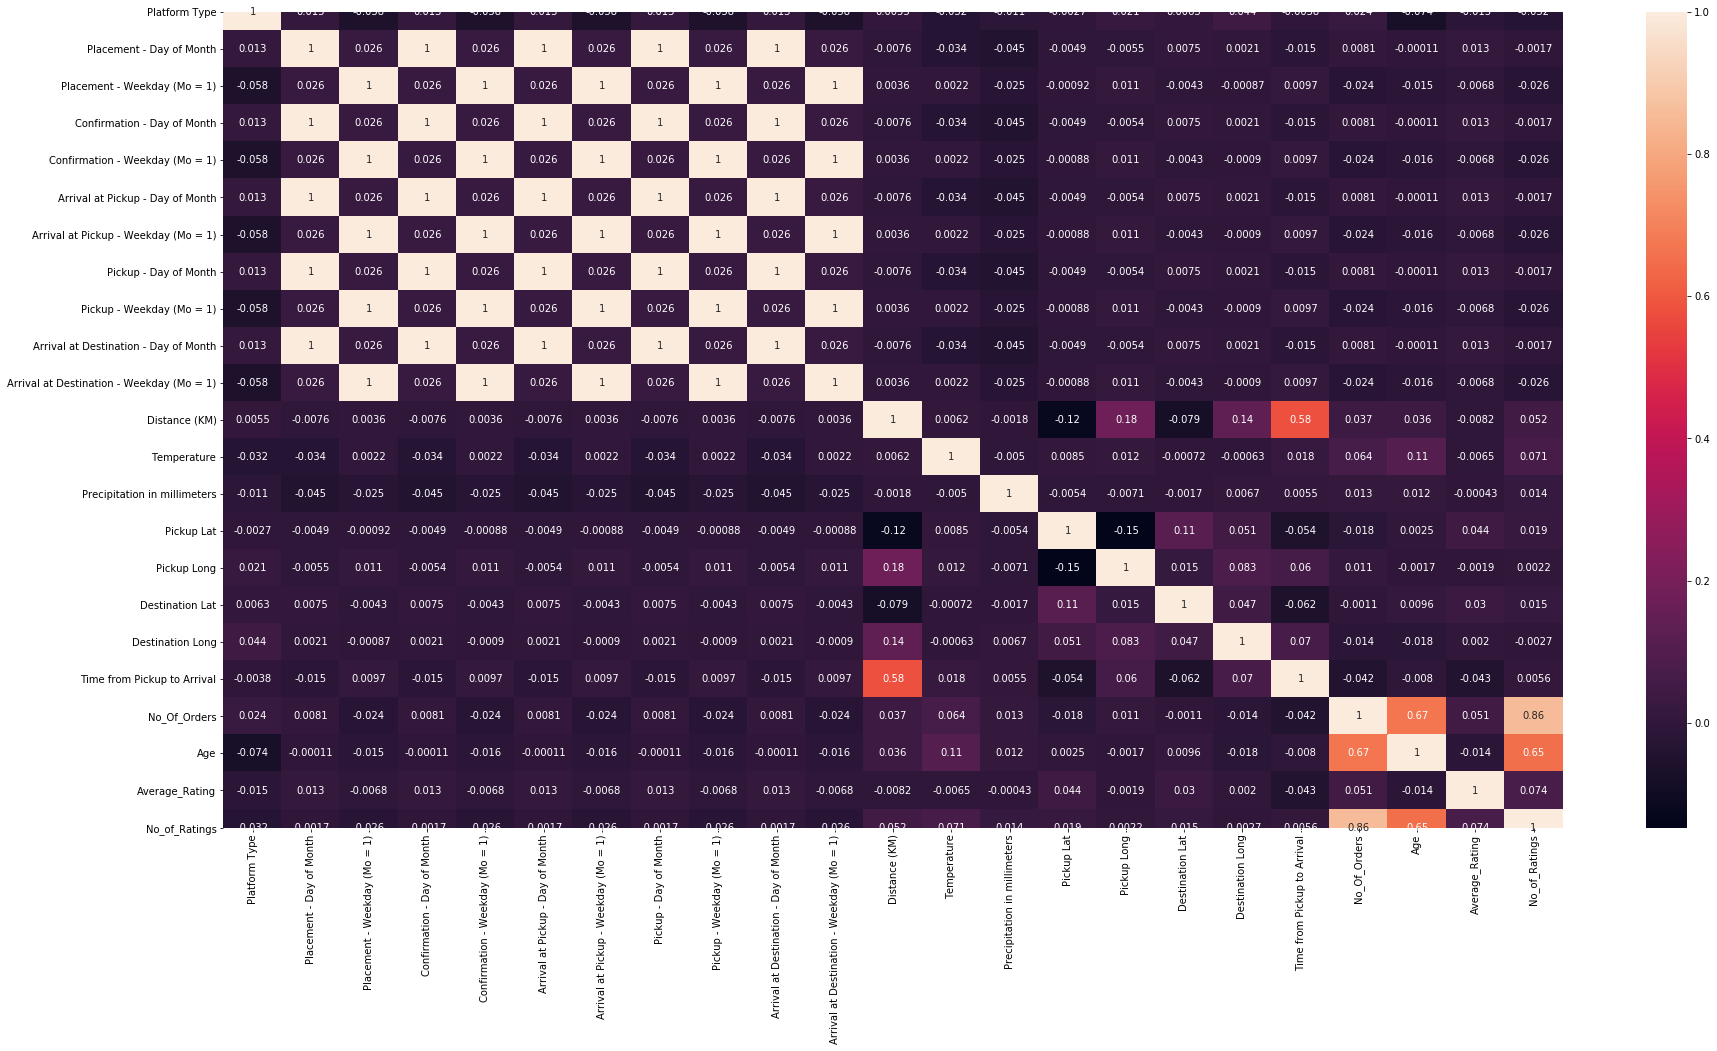

In [14]:
plt.figure(figsize=(30,15))

cor = sendy_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

From the viualization above we can conclude that the following pairs of features are correlated:
1. 'Age' and 'No_of_Orders' 
2. 'Age' and 'No_of_Ratings'
3. 'Time from Pickup to Arrival' and 'Distance'

# 5. Analysis on the features

[3 2 1 4]


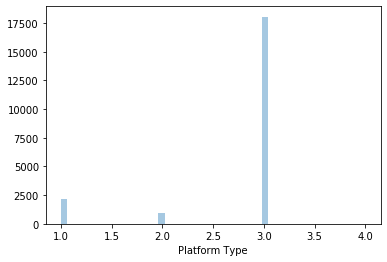

In [15]:
# Feature: Platform Type
print (sendy_train['Platform Type'].unique())
sns.distplot(a=sendy_train['Platform Type'],label="Platform Type", kde=False)

Platform 4 is the least utilised while platform 3 is the most utilised. 

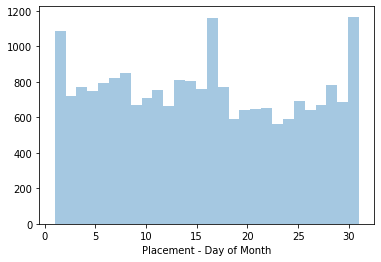

In [16]:
# Feature: Platform Type

sns.distplot(a=sendy_train['Placement - Day of Month'],label="Platform Type", kde=False)

There are clearly more placements at the beginning of the month, mid month and then at the very end of the month

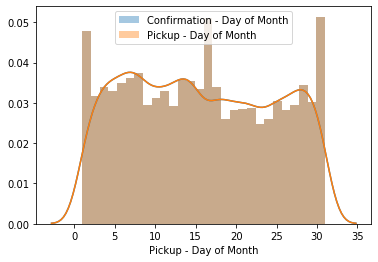

In [17]:
# Feature:Confirmation - Day of Month', Pickup - Day of Month
  
sns.distplot(a=sendy_train['Confirmation - Day of Month'],label="Confirmation - Day of Month")
sns.distplot(a=sendy_train['Pickup - Day of Month'],label="Pickup - Day of Month")
plt.legend()

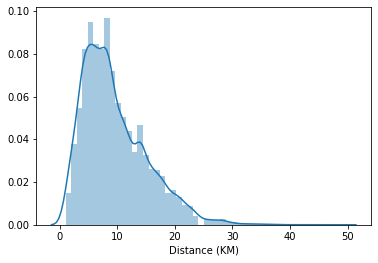

In [18]:
#Feature :Distance (KM)
sns.distplot(a=sendy_train['Distance (KM)'],label="Distance (KM)")


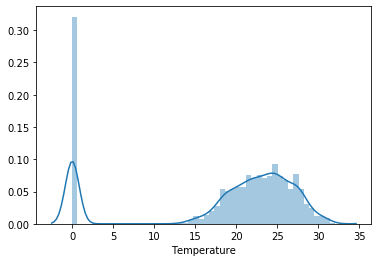

In [19]:
#Feature :Temperature
sns.distplot(a=sendy_train['Temperature'],label="Temperature")


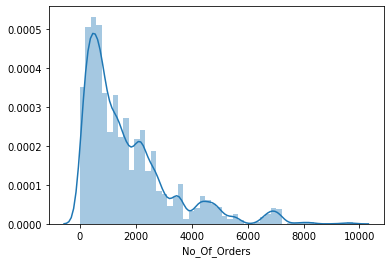

In [20]:
sns.distplot(a=sendy_train['No_Of_Orders'],label="No_Of_Orders")

A lot of riders had zero orders 

Now a look at some other features

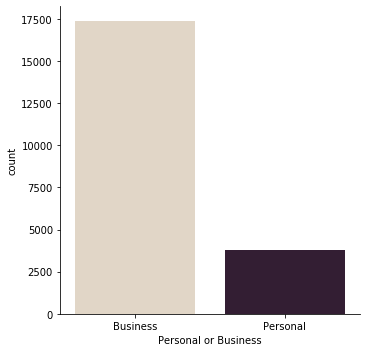

In [21]:
#Feature :Personal or Business
#sns.scatterplot(x=sendy_train['Personal or Business'], y=sendy_train['No_Of_Orders'])
sns.catplot(x='Personal or Business', kind="count", palette="ch:.25", data=sendy_train);

Most of the orders were business related orders.

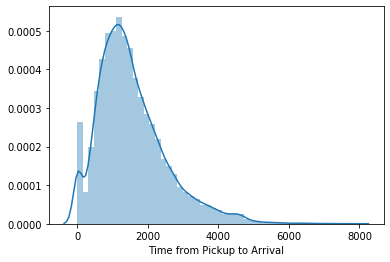

In [22]:
#Feature: Time from Pickup to Arrival
sns.distplot(a=sendy_train['Time from Pickup to Arrival']) 
#sns.scatterplot(a=sendy_train['Time from Pickup to Arrival']) 

From the visualization above it seems like riders end less  time  from pickup to arrival.

Let us look at at the time spent from pick to arrival against the distance traveled.

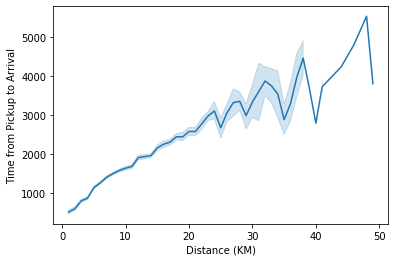

In [23]:
sns.lineplot(x=sendy_train['Distance (KM)'], y=sendy_train['Time from Pickup to Arrival'])


Time from pick up to arrival increases with the distance traveled. We can assume that the distance would contributing factor to prediciting the time taken from pickup point to arrival point. 

Let us also look at at the time spent from pick to arrival against the day of the month oon which the order is placed.

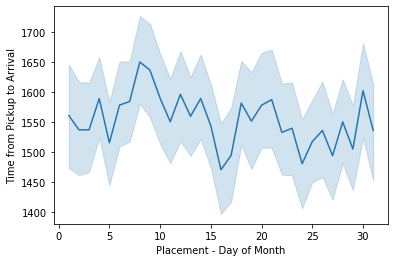

In [24]:
sns.lineplot(x=sendy_train['Placement - Day of Month'], y=sendy_train['Time from Pickup to Arrival'])

It takes the least amount of time to deliver orders during the middle of the month as compared to the beginning of the month